In [130]:
import sklearn
import pandas as pd
import random
from sklearn import datasets
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

## K-fold cross validation

In [131]:
data = pd.read_csv('mushroom.tsv', sep='\t')

In [132]:
#Create K folds
K = 5
number_of_entries = data.shape[0]
number_of_entries_edible = data[data['target'] == 0].shape[0]
number_of_entries_poisonous = data[data['target'] == 1].shape[0]

estrat = number_of_entries_poisonous / number_of_entries

instancias_por_fold = number_of_entries / K
instancias_por_fold_poison = math.floor(number_of_entries_poisonous / K)
instancias_por_fold_edible = math.floor(number_of_entries_edible / K)

fold_dataframes = []

for i in range(1,K):
    fold_df_poison = data[data['target'] == 1].sample(instancias_por_fold_poison)
    fold_df_edible = data[data['target'] == 0].sample(instancias_por_fold_edible)
    fold_df = pd.concat([fold_df_poison, fold_df_edible])
    data = data.drop(fold_df.index)
    fold_dataframes.append(fold_df)
    
fold_dataframes.append(data)

### Train KNN

In [135]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN_metrics = []
KKN_metrics_calculated = []

for i in range(0, K):
    train_data = {}

    #Cria dataset com todos os folds menos o i-ésimo, que será usado para teste
    train_data = pd.concat(fold_dataframes)
    train_data.drop(fold_dataframes[i].index)

    #Pega dados de teste, remove a coluna target
    features = train_data.columns[1:-1]
    X = train_data.loc[:, features]
    y = train_data.target

    #Faz o fitting do algoritmo
    KNN.fit(X, y)

    #Testa com dados de teste
    test_data = fold_dataframes[i].loc[:, features]
    predictions = KNN.predict(test_data)
    truth_val = fold_dataframes[i].loc[:, 'target'].tolist()

    vp = 0
    fp = 0
    vn = 0
    fn = 0
    #Contabiliza verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
    for j in range(0, test_data.shape[0]):
        if predictions[j] == 0 and predictions[j] == truth_val[j]:
            vp += 1
        elif predictions[j] == 0 and predictions[j] != truth_val[j]:
            fp += 1
        elif predictions[j] == 1 and predictions[j] == truth_val[j]:
            vn += 1
        else:
            fn += 1

    results = [vp, fp, vn, fn]
    KNN_metric = {}
    KNN_metric["acc"] = (vp + vn) / (vp + vn + fp + fn)
    KNN_metric["sens"] = (vp) / (vp + fn)
    KNN_metric["prec"] = (vp) / (vp+fp)
    
    β = 0.5
    KNN_metric["f1"] = (1+β*β)*KNN_metric["prec"]*KNN_metric["sens"]/(β*β * KNN_metric["prec"] + KNN_metric["sens"])
    
    KKN_metrics_calculated.append(KNN_metric)
    display(results)
    KNN_metrics.append(results)

[841, 0, 783, 0]

[841, 0, 783, 0]

[841, 0, 783, 0]

[841, 0, 783, 0]

[844, 0, 784, 0]

In [136]:
KKN_metrics_calculated

[{'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0}]

### Train Randomized Forest

In [137]:
RFC = RandomForestClassifier(max_depth=10, random_state=0)
RFC_metrics = []
RFC_metrics_calculated = []

for i in range(0, K):
    train_data = {}

    #Cria dataset com todos os folds menos o i-ésimo, que será usado para teste
    train_data = pd.concat(fold_dataframes)
    train_data.drop(fold_dataframes[i].index)

    #Pega dados de teste, remove a coluna target
    features = train_data.columns[1:-1]
    X = train_data.loc[:, features]
    y = train_data.target

    #Faz o fitting do algoritmo
    RFC.fit(X, y)

    #Testa com dados de teste
    test_data = fold_dataframes[i].loc[:, features]
    predictions = RFC.predict(test_data)
    truth_val = fold_dataframes[i].loc[:, 'target'].tolist()

    vp = 0
    fp = 0
    vn = 0
    fn = 0
    #Contabiliza verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
    for j in range(0, test_data.shape[0]):
        if predictions[j] == 0 and predictions[j] == truth_val[j]:
            vp += 1
        elif predictions[j] == 0 and predictions[j] != truth_val[j]:
            fp += 1
        elif predictions[j] == 1 and predictions[j] == truth_val[j]:
            vn += 1
        else:
            fn += 1

    results = [vp, fp, vn, fn]
    RFC_metric = {}
    RFC_metric["acc"] = (vp + vn) / (vp + vn + fp + fn)
    RFC_metric["sens"] = (vp) / (vp + fn)
    RFC_metric["prec"] = (vp) / (vp+fp)
    
    β = 0.5
    RFC_metric["f1"] = (1+β*β)*RFC_metric["prec"]*RFC_metric["sens"]/(β*β * RFC_metric["prec"] + RFC_metric["sens"])
    RFC_metrics_calculated.append(RFC_metric)
    display(results)
    RFC_metrics.append(results)
    

[841, 0, 783, 0]

[841, 0, 783, 0]

[841, 0, 783, 0]

[841, 0, 783, 0]

[844, 0, 784, 0]

In [138]:
RFC_metrics_calculated

[{'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0},
 {'acc': 1.0, 'sens': 1.0, 'prec': 1.0, 'f1': 1.0}]

### Train Linear Regression

In [139]:

LR = LinearRegression()
LR_metrics = []
LR_metrics_calculated = []

for i in range(0, K):
    train_data = {}

    #Cria dataset com todos os folds menos o i-ésimo, que será usado para teste
    train_data = pd.concat(fold_dataframes)
    train_data.drop(fold_dataframes[i].index)

    #Pega dados de teste, remove a coluna target
    features = train_data.columns[1:-1]
    X = train_data.loc[:, features]
    y = train_data.target

    #Faz o fitting do algoritmo
    LR.fit(X, y)

    #Testa com dados de teste
    test_data = fold_dataframes[i].loc[:, features]
    predictions = LR.predict(test_data)
    truth_val = fold_dataframes[i].loc[:, 'target'].tolist()

    vp = 0
    fp = 0
    vn = 0
    fn = 0
    #Contabiliza verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos
    for j in range(0, test_data.shape[0]):
        if predictions[j] < 0.5 and 0 == truth_val[j]:
            vp += 1
        elif predictions[j] < 0.5 and 0 != truth_val[j]:
            fp += 1
        elif predictions[j] >= 0.5 and 1 == truth_val[j]:
            vn += 1
        else:
            fn += 1

    results = [vp, fp, vn, fn]
    LR_metric = {}
    LR_metric["acc"] = (vp + vn) / (vp + vn + fp + fn)
    LR_metric["sens"] = (vp) / (vp + fn)
    LR_metric["prec"] = (vp) / (vp+fp)
    
    β = 0.5
    LR_metric["f1"] = (1+β*β)*LR_metric["prec"]*LR_metric["sens"]/(β*β * LR_metric["prec"] + LR_metric["sens"])
    LR_metrics_calculated.append(LR_metric)
    display(results)
    LR_metrics.append(results)

[796, 85, 698, 45]

[787, 59, 724, 54]

[796, 57, 726, 45]

[810, 67, 716, 31]

[811, 63, 721, 33]

In [141]:
LR_metrics_calculated

[{'acc': 0.9199507389162561,
  'sens': 0.9464922711058263,
  'prec': 0.9035187287173666,
  'f1': 0.9117983963344788},
 {'acc': 0.9304187192118226,
  'sens': 0.9357907253269917,
  'prec': 0.9302600472813238,
  'f1': 0.931360946745562},
 {'acc': 0.937192118226601,
  'sens': 0.9464922711058263,
  'prec': 0.9331770222743259,
  'f1': 0.9358100164589702},
 {'acc': 0.9396551724137931,
  'sens': 0.9631391200951248,
  'prec': 0.9236031927023945,
  'f1': 0.9312485628880203},
 {'acc': 0.941031941031941,
  'sens': 0.9609004739336493,
  'prec': 0.9279176201372997,
  'f1': 0.934331797235023}]

### Generating Graphs For Analysis

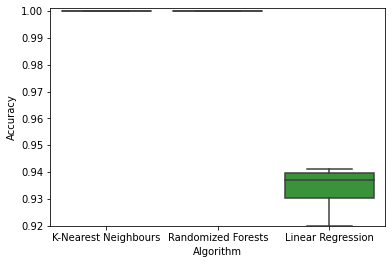

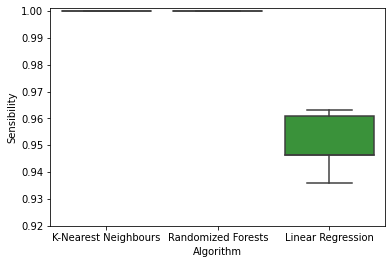

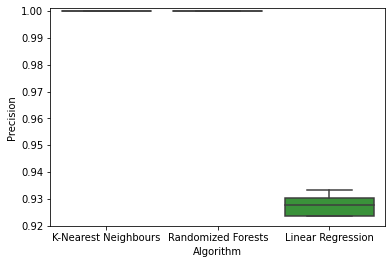

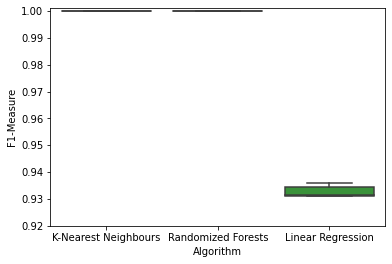

,Algorithm,Accuracy,Sensibility,Precision,F1-Measure
0,K-Nearest Neighbours,0.000000,0.000000,0.000000,0.000000
1,Randomized Forests,0.000000,0.000000,0.000000,0.000000
2,Linear Regression,0.007762,0.010163,0.010563,0.008733


In [140]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt
import math

knn_accuracies = []
knn_sensibility = []
knn_precision = []
knn_f1Measure = []
knn_name = []
randomized_accuracies = []
randomized_sensibility = []
randomized_precision = []
randomized_name = []
randomized_f1Measure =[]
lr_accuracies = []
lr_sensibility = []
lr_precision=[]
lr_f1Measure=[]
lr_name = []

### Generating Dataset for Graphs and Tables

for result in KKN_metrics_calculated:
    knn_accuracies.append(result["acc"])
    knn_sensibility.append(result["sens"])
    knn_precision.append(result["prec"])
    knn_f1Measure.append(result["f1"])
    knn_name.append('K-Nearest Neighbours')

for result in RFC_metrics_calculated:
    randomized_accuracies.append(result["acc"])
    randomized_sensibility.append(result["sens"])
    randomized_precision.append(result["prec"])
    randomized_f1Measure.append(result["f1"])
    randomized_name.append('Randomized Forests')

for result in LR_metrics_calculated:
    lr_accuracies.append(result["acc"])
    lr_sensibility.append(result["sens"])
    lr_precision.append(result["prec"])
    lr_f1Measure.append(result["f1"])
    lr_name.append('Linear Regression')
    
    
### Generating Graphs for the Accuracy, Sensibility, Precision and F1-Measure of each algorithm
    
algorithms_accuracy_data = {'Algorithm':knn_name+randomized_name+lr_name,'Accuracy':knn_accuracies+randomized_accuracies+lr_accuracies}
df = pd.DataFrame(algorithms_accuracy_data)
sbs.boxplot(x=(df["Algorithm"]), y=(df["Accuracy"]))
plt.ylim([0.92,1.001])
plt.show()

algorithms_sensibility_data = {'Algorithm':knn_name+randomized_name+lr_name,'Sensibility':knn_sensibility+randomized_sensibility+lr_sensibility}
df = pd.DataFrame(algorithms_sensibility_data)
sbs.boxplot(x=(df["Algorithm"]), y=(df["Sensibility"]))
plt.ylim([0.92,1.001])
plt.show()

algorithms_precision_data = {'Algorithm':knn_name+randomized_name+lr_name,'Precision':knn_precision+randomized_precision+lr_precision}
df = pd.DataFrame(algorithms_precision_data)
sbs.boxplot(x=(df["Algorithm"]), y=(df["Precision"]))
plt.ylim([0.92,1.001])
plt.show()

algorithms_f1_data = {'Algorithm':knn_name+randomized_name+lr_name,'F1-Measure':knn_f1Measure+randomized_f1Measure+lr_f1Measure}
df = pd.DataFrame(algorithms_f1_data)
sbs.boxplot(x=(df["Algorithm"]), y=(df["F1-Measure"]))
plt.ylim([0.92,1.001])
plt.show()

# Generating Data for Standard Deviation Table

def getStandardDeviation(listOfValues):
    mediaOfValues = sum(listOfValues)/len(listOfValues)
    sum_of_terms = 0
    
    for value in listOfValues:
        sum_of_terms += (value - mediaOfValues) ** 2
    
    standard_deviation = math.sqrt(sum_of_terms/len(listOfValues))
    return standard_deviation


algorithms_names = ['K-Nearest Neighbours', 'Randomized Forests', 'Linear Regression']
accuracies_standard_deviations = [getStandardDeviation(knn_accuracies), getStandardDeviation(randomized_accuracies), getStandardDeviation(lr_accuracies)]
sensibility_standard_deviations = [getStandardDeviation(knn_sensibility), getStandardDeviation(randomized_sensibility), getStandardDeviation(lr_sensibility)]
precision_standard_deviations = [getStandardDeviation(knn_precision), getStandardDeviation(randomized_precision), getStandardDeviation(lr_precision)]
f1_measure_standard_deviations = [getStandardDeviation(knn_f1Measure), getStandardDeviation(randomized_f1Measure), getStandardDeviation(lr_f1Measure)]

algorithms_standardDeviation_data = {'Algorithm':algorithms_names,'Accuracy':accuracies_standard_deviations, 'Sensibility':sensibility_standard_deviations, 'Precision':precision_standard_deviations, 'F1-Measure': f1_measure_standard_deviations}
df = pd.DataFrame(algorithms_standardDeviation_data)
df